# SARIMAX Models

Seasonality in data can often mask real trends and cycles, leading to less accurate models and predictions. This is where SARIMAX, or Seasonal Autoregressive Integrated Moving Average with eXogenous variables model, becomes crucial for time series analysis. 

Seasonality refers to periodic fluctuations in financial data that occur at regular intervals, such as quarterly fiscal reports or annual shopping seasons. Ignoring these patterns can render a model ineffective, as it fails to account for predictable changes over time.

## What is SARIMAX?

SARIMAX expands on the ARIMA model by accounting for seasonality and incorporating external or exogenous factors, which can have a significant impact on the variable being forecasted. Seasonal patterns that repeat over a specific period, such as sales increasing during the holidays, are captured in this model, providing a more nuanced understanding of data that is influenced by time-bound events.

## Mathematical Foundation of SARIMAX from an Example: SARIMAX(1,0,2)(2,0,1,5)

The mathematical expression for SARIMAX(1,0,2)(2,0,1,5) is illustrated as follows:

$$
Y_t = c + \phi_1 Y_{t-1} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \Phi_1(Y_{t-5} + Y_{t-6}) + \Theta_1(\varepsilon_{t-5} + \varepsilon_{t-6}) + \varepsilon_t
$$

Where:
- $ Y_t $ is the value of the time series at time t,
- $ c $ is the constant term,
- $ \phi_1 $ is the coefficient for the first autoregressive term,
- $ \theta_1 $ and $ \theta_2 $ are coefficients for the first and second moving average terms,
- $ \Phi_1 $ is the seasonal autoregressive coefficient applied to the values 5 and 6 periods ago,
- $ \Theta_1 $ is the seasonal moving average coefficient applied to the errors 5 and 6 periods ago,
- $ \varepsilon_t $ is the error term at time t.

This model structure allows for capturing both the short-term dynamics (with AR and MA terms) and the seasonal effects (with seasonal AR and MA terms) on the time series. The SARIMAX framework can handle complex time series behaviors and is widely used in economic and financial forecasting, where seasonality and external factors are common.

## Code Implementation

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02077D-01    |proj g|=  3.19272D-01

At iterate    5    f=  7.85566D-01    |proj g|=  1.74568D-02

At iterate   10    f=  7.85235D-01    |proj g|=  4.57937D-03

At iterate   15    f=  7.84915D-01    |proj g|=  1.32222D-02

At iterate   20    f=  7.84886D-01    |proj g|=  1.69105D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   1.691D-06   7.849D-01
  F =  0.78488623978638050     

CONVERG

 This problem is unconstrained.


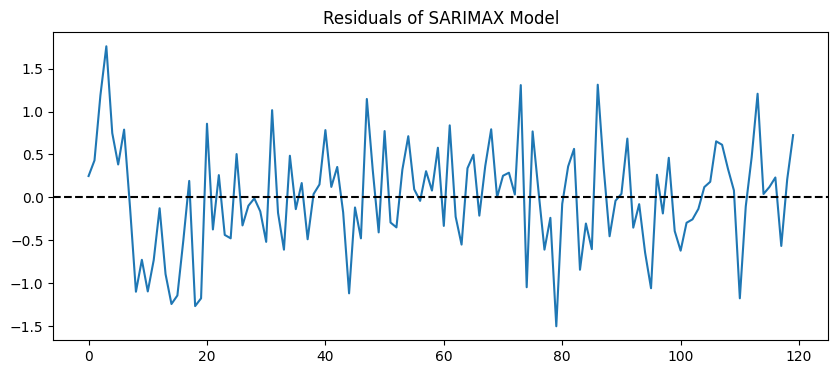

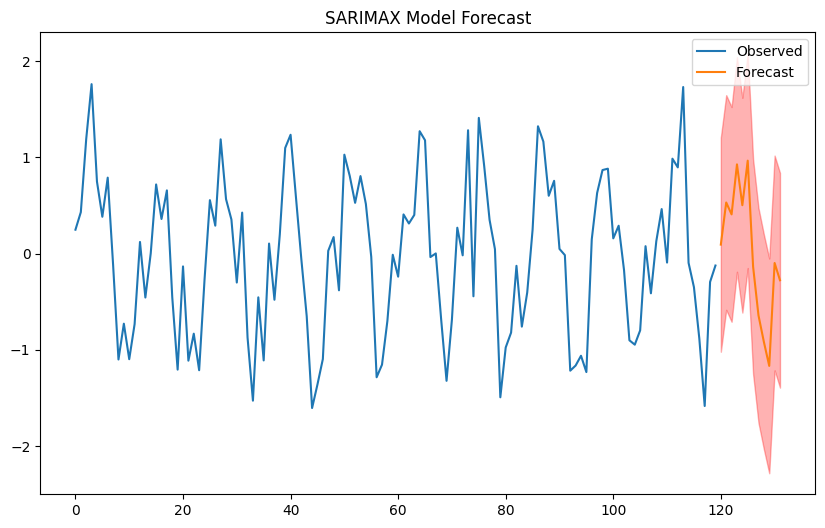

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Sample data generation
np.random.seed(42)
n = 120  # number of observations
seasonal_period = 12
data = np.sin(2 * np.pi * np.arange(n) / seasonal_period) + np.random.normal(0, 0.5, n)

# SARIMAX model fitting
model = SARIMAX(data, order=(1, 0, 1), seasonal_order=(1, 1, 0, seasonal_period))
results = model.fit()

# Summary of the model
print(results.summary())

# Residuals analysis
residuals = results.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of SARIMAX Model')
plt.axhline(0, color='black', linestyle='--')
plt.show()

# Forecasting
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observed')
plt.plot(np.arange(n, n + 12), forecast_mean, label='Forecast')
plt.fill_between(np.arange(n, n + 12), conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.show()

## Practical Considerations

While SARIMAX models offer a detailed framework for understanding seasonal behaviors in time series data, they require careful specification of the model parameters. The interpretability of the coefficients can be challenging, and the model fitting can be computationally intensive.

## Conclusion

SARIMAX models are powerful tools for capturing complex patterns in seasonal time series data. By accommodating seasonality and exogenous variables, SARIMAX provides a flexible framework for forecasting and understanding the underlying structure in data that exhibits periodic changes. However, the complexity of these models demands a deep understanding of their structure and careful interpretation of their outputs.